This notebook is for generating figures for Abstract 2 (Fibre strain homogeneity versus longitudinal strain) for HRS

Using pyvista

We will only look at:

* Endocardial fibres
* Using the atlas when looking regionally

In [139]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from hrs_23_figures import *
import pyvista as pv
from scipy import stats
from sklearn.metrics import mean_squared_error

all_cases = af_cases + nonaf_cases

len(all_cases)

29

# Global

In [2]:
## Using percentiles
## 
## First fig:
## How does global spread of strains compare between longitudinal
## fiber atlas and rule-based fibers? 

frame=4
upper_percent=99
# fibre_arch="endo_avg"

## Following arrays contain global strain standard deviation,
## mean and median for all cases
## Stored for all architectures and rule-based fibers

fib_std=np.zeros((len(all_cases),9))
fib_mean=np.zeros((len(all_cases),9))
fib_med=np.zeros((len(all_cases),9))

long_std=np.zeros((len(all_cases),))
long_mean=np.zeros((len(all_cases),))
long_med=np.zeros((len(all_cases),))

fib_arch_list = ["endo_1", "endo_2", "endo_3", "endo_4",
                 "endo_5", "endo_6", "endo_7", "endo_avg", 
                 "endo_l"]

for i in range(0, len(all_cases)):
    
    case=all_cases[i]
#     print(all_cases[i])
    
    for j in range(0, len(fib_arch_list)):
        
#         print(fib_arch_list[j])
        
        fib_data = retrieve_fibres_all_data(case, fib_arch_list[j], 
                                            frame)['f1']
        data_bounds = np.percentile(fib_data, [0, upper_percent])
        condition = fib_data[:] > data_bounds[1]
        fib_data[condition]=np.nan
        
        fib_std[i, j] = np.nanstd(fib_data)
        fib_mean[i, j] = np.nanmean(fib_data)
        fib_med[i, j] = np.nanmedian(fib_data)

    long_data = retrieve_fibres_all_data(case, "endo_avg", frame,
                                         longitudinal=True)['f1']
    long_data_bounds = np.percentile(long_data, [0, upper_percent])
    condition_l = long_data[:] > long_data_bounds[1]
    long_data[condition_l]=np.nan

    long_std[i] = np.nanstd(long_data)
    long_mean[i] = np.nanmean(long_data)
    long_med[i] = np.nanmedian(long_data)
    
#     print(case, "\t", std, "\t", std_l)

[Text(0, 0, 'Longitudinal'),
 Text(1, 0, 'endo_1'),
 Text(2, 0, 'endo_2'),
 Text(3, 0, 'endo_3'),
 Text(4, 0, 'endo_4'),
 Text(5, 0, 'endo_5'),
 Text(6, 0, 'endo_6'),
 Text(7, 0, 'endo_7'),
 Text(8, 0, 'endo_avg'),
 Text(9, 0, 'endo_l')]

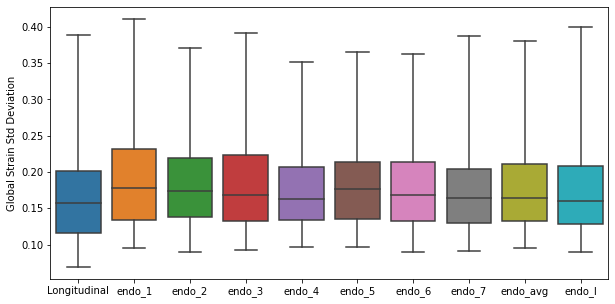

In [4]:
## Plotting global standard deviation fo strain
## for all fiber arhitectures
## Boxplots show distrbiution over the 30 cases

data_to_plot=[long_std[:], 
              fib_std[:, 0], fib_std[:, 1], fib_std[:, 2],
              fib_std[:, 3], fib_std[:, 4], fib_std[:, 5],
              fib_std[:, 6], fib_std[:, 7], fib_std[:, 8]]

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white', sharey=True)

ax1 = sns.boxplot(data=data_to_plot, orient='v', whis=(0, 100))

plt.ylabel("Global Strain Std Deviation")
x_labs = []
x_labs.append("Longitudinal")
x_labs += fib_arch_list
ax1.set_xticks(np.arange(0, 10, 1))
ax1.set_xticklabels(labels=x_labs)

[Text(0, 0, 'Longitudinal'),
 Text(1, 0, 'endo_1'),
 Text(2, 0, 'endo_2'),
 Text(3, 0, 'endo_3'),
 Text(4, 0, 'endo_4'),
 Text(5, 0, 'endo_5'),
 Text(6, 0, 'endo_6'),
 Text(7, 0, 'endo_7'),
 Text(8, 0, 'endo_avg'),
 Text(9, 0, 'endo_l')]

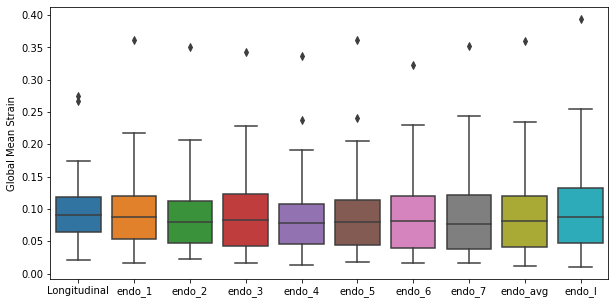

In [5]:
## Global mean of strain for all architectures

data_to_plot=[long_mean[:], 
              fib_mean[:, 0], fib_mean[:, 1], fib_mean[:, 2],
              fib_mean[:, 3], fib_mean[:, 4], fib_mean[:, 5],
              fib_mean[:, 6], fib_mean[:, 7], fib_mean[:, 8]]

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white', sharey=True)

sns.boxplot(data=data_to_plot, ax=ax1)

plt.ylabel("Global Mean Strain")
x_labs = []
x_labs.append("Longitudinal")
x_labs += fib_arch_list
ax1.set_xticks(np.arange(0, 10, 1))
ax1.set_xticklabels(labels=x_labs)

[Text(0, 0, 'Longitudinal'),
 Text(1, 0, 'endo_1'),
 Text(2, 0, 'endo_2'),
 Text(3, 0, 'endo_3'),
 Text(4, 0, 'endo_4'),
 Text(5, 0, 'endo_5'),
 Text(6, 0, 'endo_6'),
 Text(7, 0, 'endo_7'),
 Text(8, 0, 'endo_avg'),
 Text(9, 0, 'endo_l')]

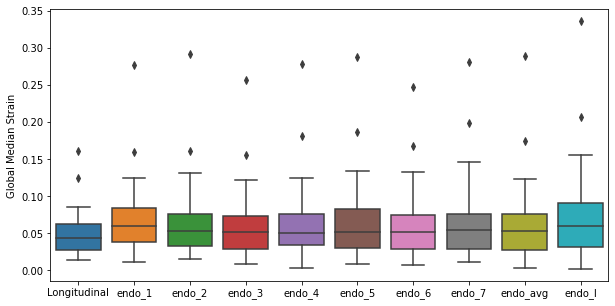

In [6]:
## Global median of strain

data_to_plot=[long_med[:], 
              fib_med[:, 0], fib_med[:, 1], fib_med[:, 2],
              fib_med[:, 3], fib_med[:, 4], fib_med[:, 5],
              fib_med[:, 6], fib_med[:, 7], fib_med[:, 8]]

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white', sharey=True)

sns.boxplot(data=data_to_plot, ax=ax1)

plt.ylabel("Global Median Strain")
x_labs = []
x_labs.append("Longitudinal")
x_labs += fib_arch_list
ax1.set_xticks(np.arange(0, 10, 1))
ax1.set_xticklabels(labels=x_labs)

## Abstract Figures

Using only the endo_avg DT-MRI architecture

P value between dtmri and rule based fibre:  0.914
P value between long and ftmri fibre:  0.503


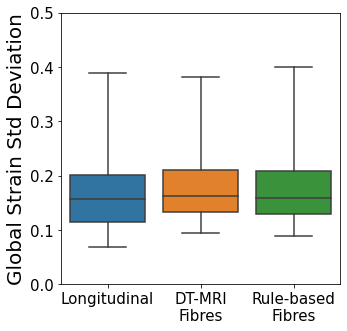

In [34]:
## Plotting global standard deviation 

## Boxplots show distrbiution over the 30 cases

data_to_plot=[long_std[:], fib_std[:, 7], fib_std[:, 8]]

fig, ((ax1)) = plt.subplots(1,1,figsize=(5,5), facecolor='white', sharey=True)

ax1 = sns.boxplot(data=data_to_plot, orient='v', whis=(0, 100))

plt.ylabel("Global Strain Std Deviation", fontsize=20)
x_labs = []
x_labs.append("Longitudinal")
x_labs += ["DT-MRI\nFibres", "Rule-based\nFibres"]
plt.yticks(fontsize=15)
ax1.set_xticks(np.arange(0, 3, 1))
ax1.set_xticklabels(labels=x_labs, fontsize=15)

plt.ylim(0.0, 0.5)

pval_fibs = stats.ttest_ind(fib_std[:, 7], fib_std[:, 8])[-1]
pval_dtfibs_long = stats.ttest_ind(long_std[:], fib_std[:, 7])[-1]

print("P value between dtmri and rule based fibre: ", 
      np.round(pval_fibs, 3))

print("P value between long and ftmri fibre: ", 
      np.round(pval_dtfibs_long, 3))

# plt.savefig

In [31]:
pval = stats.ttest_ind(fib_std[:, 7], fib_std[:, 8])[-1]
np.round(pval, 3)
# pval = stats.ttest_ind(nAF_LA_EF, AF_LA_EF)[-1]
# plt.text(0.28, 80, f'p = {str(np.round(pval,3))}', size=15)

0.914

P value between dtmri and rule based fibre:  0.688
P value between long and ftmri fibre:  0.663


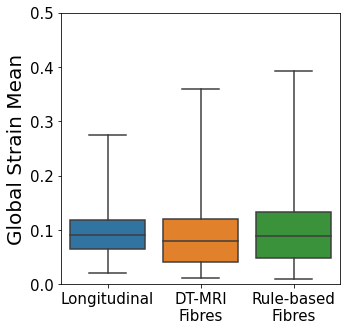

In [35]:
## Plotting global mean

## Boxplots show distrbiution over the 30 cases

data_to_plot=[long_mean[:], fib_mean[:, 7], fib_mean[:, 8]]

fig, ((ax1)) = plt.subplots(1,1,figsize=(5,5), facecolor='white', sharey=True)

ax1 = sns.boxplot(data=data_to_plot, orient='v', whis=(0, 100))

plt.ylabel("Global Strain Mean", fontsize=20)
x_labs = []
x_labs.append("Longitudinal")
x_labs += ["DT-MRI\nFibres", "Rule-based\nFibres"]
plt.yticks(fontsize=15)
ax1.set_xticks(np.arange(0, 3, 1))
ax1.set_xticklabels(labels=x_labs, fontsize=15)

plt.ylim(0.0, 0.5)

pval_fibs = stats.ttest_ind(fib_mean[:, 7], fib_mean[:, 8])[-1]
pval_dtfibs_long = stats.ttest_ind(long_mean[:], fib_mean[:, 7])[-1]

print("P value between dtmri and rule based fibre: ", 
      np.round(pval_fibs, 3))

print("P value between long and ftmri fibre: ", 
      np.round(pval_dtfibs_long, 3))

P value between dtmri and rule based fibre:  0.446
P value between long and ftmri fibre:  0.293


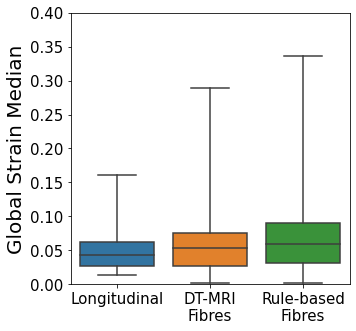

In [36]:
## Plotting global median

## Boxplots show distrbiution over the 30 cases

data_to_plot=[long_med[:], fib_med[:, 7], fib_med[:, 8]]

fig, ((ax1)) = plt.subplots(1,1,figsize=(5,5), facecolor='white', sharey=True)

ax1 = sns.boxplot(data=data_to_plot, orient='v', whis=(0, 100))

plt.ylabel("Global Strain Median", fontsize=20)
x_labs = []
x_labs.append("Longitudinal")
x_labs += ["DT-MRI\nFibres", "Rule-based\nFibres"]
plt.yticks(fontsize=15)
ax1.set_xticks(np.arange(0, 3, 1))
ax1.set_xticklabels(labels=x_labs, fontsize=15)

plt.ylim(0.0, 0.4)

pval_fibs = stats.ttest_ind(fib_med[:, 7], fib_med[:, 8])[-1]
pval_dtfibs_long = stats.ttest_ind(long_med[:], fib_med[:, 7])[-1]

print("P value between dtmri and rule based fibre: ", 
      np.round(pval_fibs, 3))

print("P value between long and ftmri fibre: ", 
      np.round(pval_dtfibs_long, 3))

# Regional

In [38]:
## Regionally 

frame=4
upper_percent=99
# fib_arch="endo_avg"

## N_cases, N_regions

fib_reg_std=np.zeros((len(all_cases),5,2))
fib_reg_mean=np.zeros((len(all_cases),5,2))
fib_reg_med=np.zeros((len(all_cases),5,2))

long_reg_std=np.zeros((len(all_cases),5))
long_reg_mean=np.zeros((len(all_cases),5))
long_reg_med=np.zeros((len(all_cases),5))

p_val_std=np.zeros((5,))

regions = ["roof", "sept", "lat", "ant", "post"]
fibre_arch_list = ["endo_avg", "endo_l"]

for i in range(0, len(all_cases)):
    case=all_cases[i]
#     print(case)
    
    for region_j in range(0,len(regions)):
        region = regions[region_j]
#         print(region)

        for fib_k in range(0,len(fibre_arch_list)):
            fib_arch = fibre_arch_list[fib_k]
#             print(fib_arch)
    
            ## All regional cell data
            ## Fibres
            data = extract_region(case, fib_arch, frame,
                                  region_j+1)['f1']
            data_bounds = np.percentile(data, [0, upper_percent])
            condition = data[:] > data_bounds[1]
            data[condition]=np.nan
            
            fib_reg_std[i, region_j, fib_k]=np.nanstd(data)
            fib_reg_mean[i, region_j, fib_k]=np.nanmean(data)
            fib_reg_med[i, region_j, fib_k]=np.nanmedian(data)

        ## All regional cell data
        ## Longitudinal
        long_data = extract_region(case, fib_arch, frame,
                                   region_j+1, longitudinal=True)['f1']
        long_data_bounds = np.percentile(long_data, [0, upper_percent])
        condition_l = long_data[:] > long_data_bounds[1]
        long_data[condition_l]=np.nan
        
        long_reg_std[i, region_j]=np.nanstd(long_data)
        long_reg_mean[i, region_j]=np.nanmean(long_data)
        long_reg_med[i, region_j]=np.nanmedian(long_data)

#         print(case, "\t", std, "\t", std_l)

# for i in range(0, len(regions)):
#     p_val_std[i] = stats.ttest_ind(fib_std[:, i], long_std[:, i])[-1]

#     print(p_val_std[i])
    
## More pronounced differences between spread of strain values
## Long seems to have more homogeneous strains except for the lateral wall

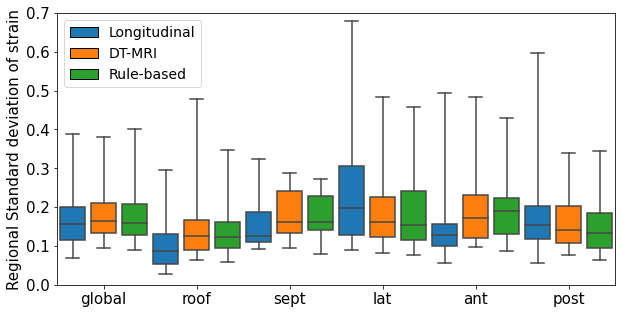

In [51]:
## Plotting
## Std deviation
## Reigonally 

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [long_std[:], fib_std[:, 7], fib_std[:, 8],
                long_reg_std[:, 0], fib_reg_std[:, 0, 0], fib_reg_std[:, 0, 1],
                long_reg_std[:, 1], fib_reg_std[:, 1, 0], fib_reg_std[:, 1, 1],
                long_reg_std[:, 2], fib_reg_std[:, 2, 0], fib_reg_std[:, 2, 1],
                long_reg_std[:, 3], fib_reg_std[:, 3, 0], fib_reg_std[:, 3, 1],
                long_reg_std[:, 4], fib_reg_std[:, 4, 0], fib_reg_std[:, 4, 1]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 18, 3):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')
    
    mybox = ax1.patches[i+2]
    mybox.set_facecolor('tab:green')

x_labs = []
x_labs.append("global")
x_labs += regions

plt.yticks(fontsize=15)
plt.ylabel("Regional Standard deviation of strain", fontsize=15)
plt.xticks(np.arange(1.0, 19.0, 3), x_labs, fontsize=15)
plt.ylim(0,0.7)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='Longitudinal'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='DT-MRI'),
                  Patch(facecolor='tab:green', edgecolor='black',
                         label='Rule-based')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)


In [48]:
## p values between two fib arch;s for all regions

pval_reg_fibs = np.zeros((5,))

print("Between fibres:")

for region_i in range(0, pval_reg_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_std[:, region_i, 0], fib_reg_std[:, region_i, 1])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")
    
pval_reg_long_dtmri_fibs = np.zeros((5,))

print("\nBetween Long and DTMRI fibres:")

for region_i in range(0, pval_reg_long_dtmri_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_std[:, region_i, 0], long_reg_std[:, region_i])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")


Between fibres:
Region: roof pval: 0.637
Region: sept pval: 0.694
Region: lat pval: 0.926
Region: ant pval: 0.678
Region: post pval: 0.591

Between Long and DTMRI fibres:
Region: roof pval: 0.011
Region: sept pval: 0.026
Region: lat pval: 0.121
Region: ant pval: 0.071
Region: post pval: 0.322


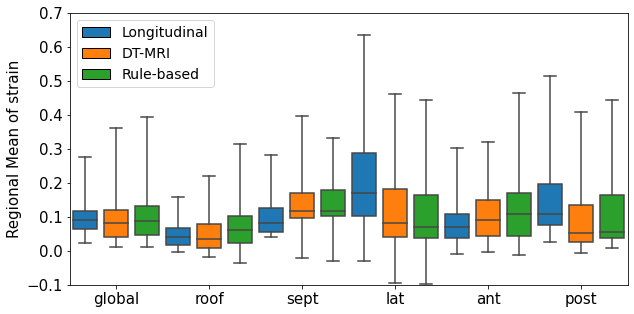

In [55]:
## Plotting
## Mean
## Regionally

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [long_mean[:], fib_mean[:, -2], fib_mean[:, -1],
                long_reg_mean[:, 0], fib_reg_mean[:, 0, 0], fib_reg_mean[:, 0, 1],
                long_reg_mean[:, 1], fib_reg_mean[:, 1, 0], fib_reg_mean[:, 1, 1],
                long_reg_mean[:, 2], fib_reg_mean[:, 2, 0], fib_reg_mean[:, 2, 1],
                long_reg_mean[:, 3], fib_reg_mean[:, 3, 0], fib_reg_mean[:, 3, 1],
                long_reg_mean[:, 4], fib_reg_mean[:, 4, 0], fib_reg_mean[:, 4, 1]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 18, 3):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')
    
    mybox = ax1.patches[i+2]
    mybox.set_facecolor('tab:green')

x_labs = []
x_labs.append("global")
x_labs += regions

plt.ylabel("Regional Mean of strain", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(1.0, 19.0, 3), x_labs, fontsize=15)
plt.ylim(-0.1, 0.7)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='Longitudinal'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='DT-MRI'),
                  Patch(facecolor='tab:green', edgecolor='black',
                         label='Rule-based')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

In [56]:
## p values

pval_reg_fibs = np.zeros((5,))

print("Between fibres:")

for region_i in range(0, pval_reg_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_mean[:, region_i, 0], fib_reg_mean[:, region_i, 1])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")
    
pval_reg_long_dtmri_fibs = np.zeros((5,))

print("\nBetween Long and DTMRI fibres:")

for region_i in range(0, pval_reg_long_dtmri_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_mean[:, region_i, 0], long_reg_mean[:, region_i])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")


Between fibres:
Region: roof pval: 0.367
Region: sept pval: 0.788
Region: lat pval: 0.93
Region: ant pval: 0.418
Region: post pval: 0.543

Between Long and DTMRI fibres:
Region: roof pval: 0.369
Region: sept pval: 0.12
Region: lat pval: 0.015
Region: ant pval: 0.301
Region: post pval: 0.032


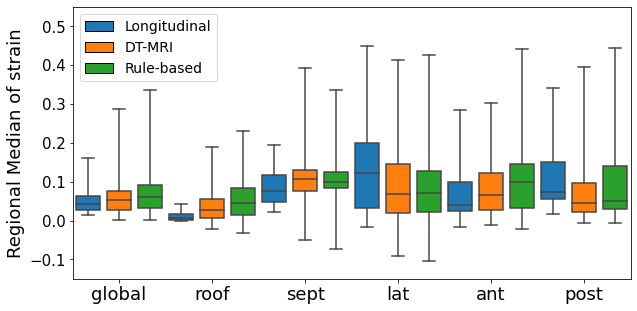

In [68]:
## Plotting
## Medians
## Regionally 

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [long_med[:], fib_med[:, -2], fib_med[:, -1],
                long_reg_med[:, 0], fib_reg_med[:, 0, 0], fib_reg_med[:, 0, 1],
                long_reg_med[:, 1], fib_reg_med[:, 1, 0], fib_reg_med[:, 1, 1],
                long_reg_med[:, 2], fib_reg_med[:, 2, 0], fib_reg_med[:, 2, 1],
                long_reg_med[:, 3], fib_reg_med[:, 3, 0], fib_reg_med[:, 3, 1],
                long_reg_med[:, 4], fib_reg_med[:, 4, 0], fib_reg_med[:, 4, 1]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 18, 3):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')
    
    mybox = ax1.patches[i+2]
    mybox.set_facecolor('tab:green')

x_labs = []
x_labs.append("global")
x_labs += regions

plt.ylabel("Regional Median of strain", fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(np.arange(1.0, 19.0, 3), x_labs, fontsize=18)
plt.ylim(-0.15, 0.55)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='Longitudinal'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='DT-MRI'),
                  Patch(facecolor='tab:green', edgecolor='black',
                         label='Rule-based')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

In [69]:
## p values

pval_reg_fibs = np.zeros((5,))

print("Between fibres:")

for region_i in range(0, pval_reg_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_med[:, region_i, 0], fib_reg_med[:, region_i, 1])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")
    
pval_reg_long_dtmri_fibs = np.zeros((5,))

print("\nBetween Long and DTMRI fibres:")

for region_i in range(0, pval_reg_long_dtmri_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_med[:, region_i, 0], long_reg_med[:, region_i])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")


Between fibres:
Region: roof pval: 0.218
Region: sept pval: 0.731
Region: lat pval: 0.927
Region: ant pval: 0.341
Region: post pval: 0.374

Between Long and DTMRI fibres:
Region: roof pval: 0.004
Region: sept pval: 0.241
Region: lat pval: 0.112
Region: ant pval: 0.292
Region: post pval: 0.112


# Scatter Plots

Enable one to gain a case-by-case comparison of quantities

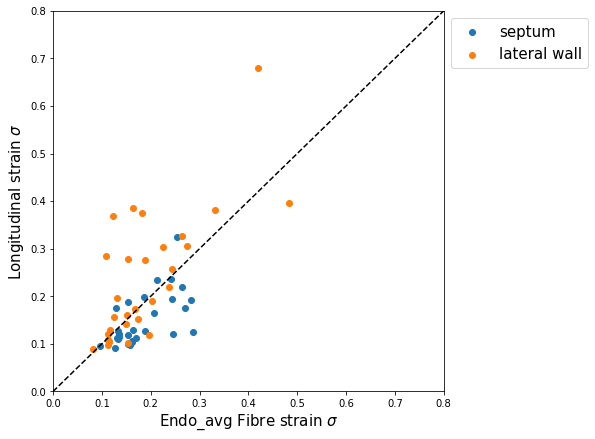

In [169]:
## Plotting Std Dev

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

# ax1.scatter(fib_std[:, -2], long_std[:], label="global")
# ax1.scatter(fib_reg_std[:, 0, 0], long_reg_std[:, 0], label="roof")
ax1.scatter(fib_reg_std[:, 1, 0], long_reg_std[:, 1], label="septum")
ax1.scatter(fib_reg_std[:, 2, 0], long_reg_std[:, 2], label="lateral wall")
# ax1.scatter(fib_reg_std[:, 3, 0], long_reg_std[:, 3], label="anterior wall")
# ax1.scatter(fib_reg_std[:, 4, 0], long_reg_std[:, 4], label="posterior wall")

ax1.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain $\sigma$", fontsize=15)
ax1.set_ylabel("Longitudinal strain $\sigma$", fontsize=15)
plt.ylim(0.0, 0.8)
plt.xlim(0.0, 0.8)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

In [191]:
## Calculate pearson r coeff between long and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_std[:, -2], long_std[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_std[:, -2], long_std[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_std[:, i, 0], 
                                 long_reg_std[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_std[:, i, 0], 
                                 long_reg_std[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.885	rmse:	0.038
Region: roof 	r:	0.675 	rmse:	0.08
Region: sept 	r:	0.616 	rmse:	0.059
Region: lat 	r:	0.717 	rmse:	0.103
Region: ant 	r:	0.909 	rmse:	0.054
Region: post 	r:	0.83 	rmse:	0.066


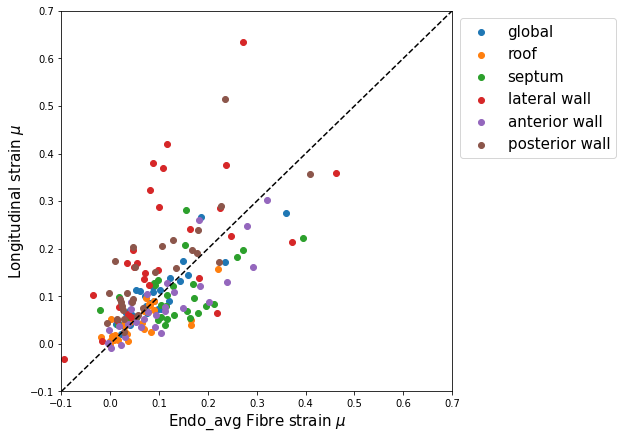

In [97]:
## Plot Mean

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

ax1.scatter(fib_mean[:, -2], long_mean[:], label="global")
ax1.scatter(fib_reg_mean[:, 0, 0], long_reg_mean[:, 0], label="roof")
ax1.scatter(fib_reg_mean[:, 1, 0], long_reg_mean[:, 1], label="septum")
ax1.scatter(fib_reg_mean[:, 2, 0], long_reg_mean[:, 2], label="lateral wall")
ax1.scatter(fib_reg_mean[:, 3, 0], long_reg_mean[:, 3], label="anterior wall")
ax1.scatter(fib_reg_mean[:, 4, 0], long_reg_mean[:, 4], label="posterior wall")

ax1.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain $\mu$", fontsize=15)
ax1.set_ylabel("Longitudinal strain $\mu$", fontsize=15)
plt.ylim(-0.1, 0.7)
plt.xlim(-0.1, 0.7)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

In [192]:
## Calculate pearson r coeff between long and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_mean[:, -2], long_mean[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_mean[:, -2], long_mean[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_mean[:, i, 0], 
                                 long_reg_mean[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_mean[:, i, 0], 
                                 long_reg_mean[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.889	rmse:	0.034
Region: roof 	r:	0.735 	rmse:	0.039
Region: sept 	r:	0.545 	rmse:	0.077
Region: lat 	r:	0.571 	rmse:	0.153
Region: ant 	r:	0.847 	rmse:	0.053
Region: post 	r:	0.792 	rmse:	0.087


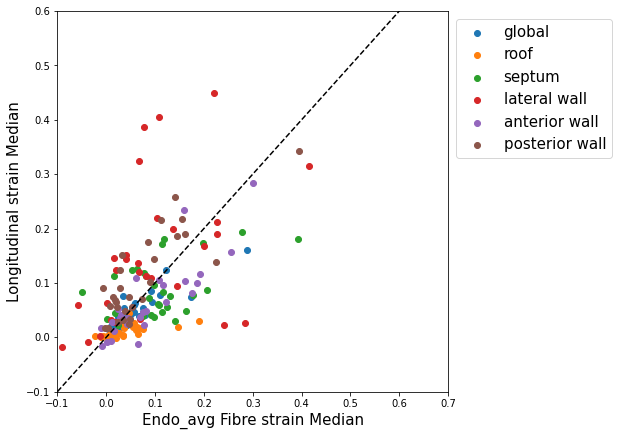

In [193]:
## Plotting Median

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_med[:, -2], long_med[:], label="global")
ax1.scatter(fib_reg_med[:, 0, 0], long_reg_med[:, 0], label="roof")
ax1.scatter(fib_reg_med[:, 1, 0], long_reg_med[:, 1], label="septum")
ax1.scatter(fib_reg_med[:, 2, 0], long_reg_med[:, 2], label="lateral wall")
ax1.scatter(fib_reg_med[:, 3, 0], long_reg_med[:, 3], label="anterior wall")
ax1.scatter(fib_reg_med[:, 4, 0], long_reg_med[:, 4], label="posterior wall")


ax1.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain Median", fontsize=15)
ax1.set_ylabel("Longitudinal strain Median", fontsize=15)
plt.ylim(-0.1, 0.6)
plt.xlim(-0.1, 0.7)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

In [194]:
## Calculate pearson r coeff between long and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_med[:, -2], long_med[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_med[:, -2], long_med[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_med[:, i, 0], 
                                 long_reg_med[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_med[:, i, 0], 
                                 long_reg_med[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.863	rmse:	0.035
Region: roof 	r:	0.656 	rmse:	0.047
Region: sept 	r:	0.478 	rmse:	0.078
Region: lat 	r:	0.435 	rmse:	0.136
Region: ant 	r:	0.853 	rmse:	0.046
Region: post 	r:	0.825 	rmse:	0.06
